# Is there a salary difference between Country of Birth? 

## Import the required packages, data, and clean the data

In [12]:
exec(open("../Scripts/Packages.py").read())
exec(open("../Scripts/Data_Import.py").read())
exec(open("../Scripts/Data_Cleaning.py").read())

Keep only applicable columns for this analysis, and round to millions

In [13]:
CoB_Analysis = Salary_Analysis.loc[:, ['birthCountry', 'salary'] ]
CoB_Analysis['salary'] = CoB_Analysis['salary']/1000000

Add any other needed formats

In [14]:
Pivot = CoB_Analysis.pivot(columns='birthCountry', values='salary')

## Manually examine the differences in the group

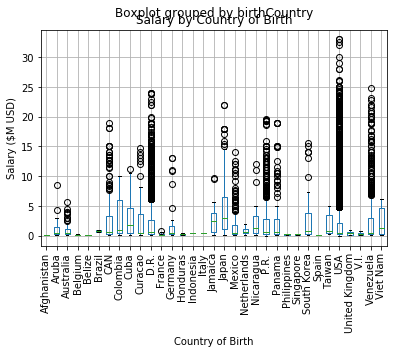

In [15]:
CoB_Analysis.boxplot(by = 'birthCountry', rot=90)
plt.title('Salary by Country of Birth')
plt.xlabel('Country of Birth')
plt.ylabel('Salary ($M USD)')
plt.show()

In [16]:
Country_Count = CoB_Analysis.groupby(['birthCountry']).count()
Country_Count.sort_values(by='salary', ascending = False)


,salary
birthCountry,
USA,19881
D.R.,2057
Venezuela,1045
P.R.,877
Mexico,322
CAN,297
Cuba,238
Japan,198
Panama,150


In [17]:
Country_Count['birthCountry'] = Country_Count.index
Top_15 = Country_Count.nlargest(15, 'salary')
List15 = Top_15['birthCountry'].tolist()
Filter_CoB_Analysis = CoB_Analysis.loc[CoB_Analysis['birthCountry'].isin(List15)]

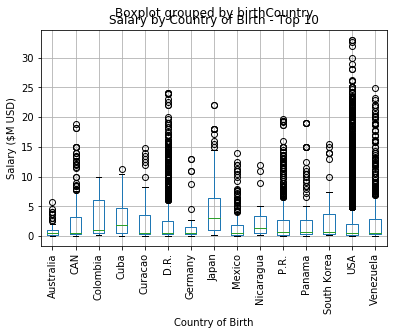

In [18]:
Filter_CoB_Analysis.boxplot(by = 'birthCountry', rot=90)
plt.title('Salary by Country of Birth - Top 10')
plt.xlabel('Country of Birth')
plt.ylabel('Salary ($M USD)')
plt.show()

## Use statistical testing to confirm the variance

Set the significance value before any testing. 

In [19]:
alpha_value = 0.001
independent = True

Combined Statistical Testing Workflow

In [20]:
T, pval = stats.bartlett(*[Pivot[col] for col in Pivot.columns])
print("T-statistic:", T)
print("P-Value:", pval)
print("  ")

T-statistic: nan
P-Value: nan
  


In [21]:
exec(open("../Scripts/Data_Testing/Statistical_Tests.py").read())

Comparing Standard Deviations

T-statistic: nan
P-Value: nan
  
Error


Checking for Normality

P-value: 2.60606364293e-12
  
Reject NULL hypothesis - Not normal distribution


ANOVA Testing

Can one use ANOVA?
  
Independent:  True
Normal:  False
StdDevEq:  False
  
The assumptions to use ANOVA have not been met.

Kruskal-Wallis Testing

H-statistic: 337.645808329
P-Value: 1.038135794e-52

Reject NULL hypothesis - Significant differences exist between groups.


If variable is statistically significant, append to analysis for further investigation

In [22]:
if Sig == True: 
    columns = list(CoB_Analysis)
    Capstone_csv = pd.read_csv("../Data/Capstone.csv")
    Capstone_csv[columns] = Salary_Analysis[columns]
    Capstone_csv.to_csv("../Data/Capstone.csv", index = False)